datetime64[ns, UTC]
Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'temp_0', 'temp_min_0', 'temp_max_0',
       'pressure_0', 'humidity_0', 'wind_speed_0', 'wind_deg_0', 'rain_1h_0',
       'snow_3h_0', 'clouds_all_0', 'weather_id_0', 'temp_1', 'temp_min_1',
       'temp_max_1', 'pressure_1', 'humidity_1', 'wind_speed_1', 'wind_deg_1',
       'rain_1h_1', 'snow_3h_1', 'clouds_all_1', 'weather_id_1', 'temp_2',
       'temp_min_2', 'temp_max_2', 'pressure_2', 'humidity_2', 'wind_speed_2',
       'wind_deg_2', 'ra

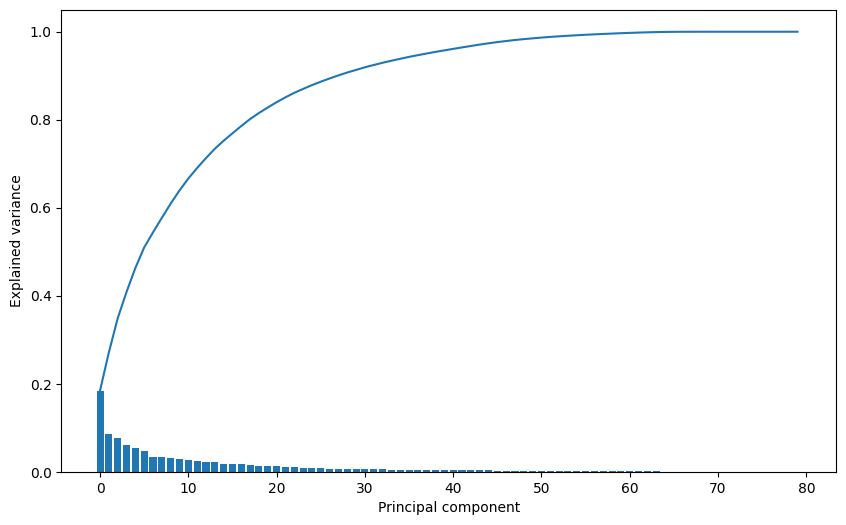

In [40]:
%run featuregeneration.ipynb


### Linear Regression

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Reshape from 3D to 2D by combining timesteps and features dimensions
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)


linear_model = LinearRegression()
linear_model.fit(X_train_reshaped, y_train)

# Validation and Test Predictions
y_pred_val_linear = linear_model.predict(X_val_reshaped)
y_pred_test_linear = linear_model.predict(X_test_reshaped)

# Validation and Test Scores
print("Linear Regression Validation MSE:", mean_squared_error(y_val, y_pred_val_linear))
print("Linear Regression Validation R2:", r2_score(y_val, y_pred_val_linear))
print("Linear Regression Test MSE:", mean_squared_error(y_test, y_pred_test_linear))
print("Linear Regression Test R2:", r2_score(y_test, y_pred_test_linear))


Linear Regression Validation MSE: 0.0006191915985758557
Linear Regression Validation R2: 0.9588478850438438
Linear Regression Test MSE: 0.0004373810562516754
Linear Regression Test R2: 0.9368987924445514


In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_reshaped, y_train)

# Validation and Test Predictions
y_pred_val_dt = dt_model.predict(X_val_reshaped)
y_pred_test_dt = dt_model.predict(X_test_reshaped)

# Validation and Test Scores
print("Decision Tree Validation MSE:", mean_squared_error(y_val, y_pred_val_dt))
print("Decision Tree Validation R2:", r2_score(y_val, y_pred_val_dt))
print("Decision Tree Test MSE:", mean_squared_error(y_test, y_pred_test_dt))
print("Decision Tree Test R2:", r2_score(y_test, y_pred_test_dt))
#Print accuracy
print("Accuracy:", dt_model.score(X_test_reshaped, y_test))


Decision Tree Validation MSE: 0.0016634640128951508
Decision Tree Validation R2: 0.8894444588047752
Decision Tree Test MSE: 0.0014446222702268197
Decision Tree Test R2: 0.7915835438918677


In [46]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)  # Reduced estimators for quicker runtime
rf_model.fit(X_train_reshaped, y_train)

# Validation and Test Predictions
y_pred_val_rf = rf_model.predict(X_val_reshaped)
y_pred_test_rf = rf_model.predict(X_test_reshaped)

# Validation and Test Scores
print("Random Forest Validation MSE:", mean_squared_error(y_val, y_pred_val_rf))
print("Random Forest Validation R2:", r2_score(y_val, y_pred_val_rf))
print("Random Forest Test MSE:", mean_squared_error(y_test, y_pred_test_rf))
print("Random Forest Test R2:", r2_score(y_test, y_pred_test_rf))


Random Forest Validation MSE: 0.0007045342037966978
Random Forest Validation R2: 0.9531759271090404
Random Forest Test MSE: 0.0004876458472854373
Random Forest Test R2: 0.9296470631654316


In [ ]:
svm_pipeline = Pipeline([('scaler', StandardScaler()), ('svr', SVR(kernel='rbf'))])
svm_pipeline.fit(X_train, y_train)

# Validation and Test Predictions
y_pred_val_svm = svm_pipeline.predict(X_val)
y_pred_test_svm = svm_pipeline.predict(X_test)

# Validation and Test Scores
print("SVM Validation MSE:", mean_squared_error(y_val, y_pred_val_svm))
print("SVM Validation R2:", r2_score(y_val, y_pred_val_svm))
print("SVM Test MSE:", mean_squared_error(y_test, y_pred_test_svm))
print("SVM Test R2:", r2_score(y_test, y_pred_test_svm))


SVM with Kernel MSE: 44.17448930251864
SVM with Kernel R2: 0.7824644766991611


In [ ]:
nn_pipeline = Pipeline([('scaler', StandardScaler()), ('mlp', MLPRegressor(random_state=42, max_iter=200))])
nn_pipeline.fit(X_train, y_train)

# Validation and Test Predictions
y_pred_val_nn = nn_pipeline.predict(X_val)
y_pred_test_nn = nn_pipeline.predict(X_test)

# Validation and Test Scores
print("Neural Network Validation MSE:", mean_squared_error(y_val, y_pred_val_nn))
print("Neural Network Validation R2:", r2_score(y_val, y_pred_val_nn))
print("Neural Network Test MSE:", mean_squared_error(y_test, y_pred_test_nn))
print("Neural Network Test R2:", r2_score(y_test, y_pred_test_nn))


Neural Network MSE: 21.568224541755235
Neural Network R2: 0.8937881323261113


C:\Users\asmun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


14:22:37 - cmdstanpy - INFO - Chain [1] start processing
14:23:12 - cmdstanpy - INFO - Chain [1] done processing


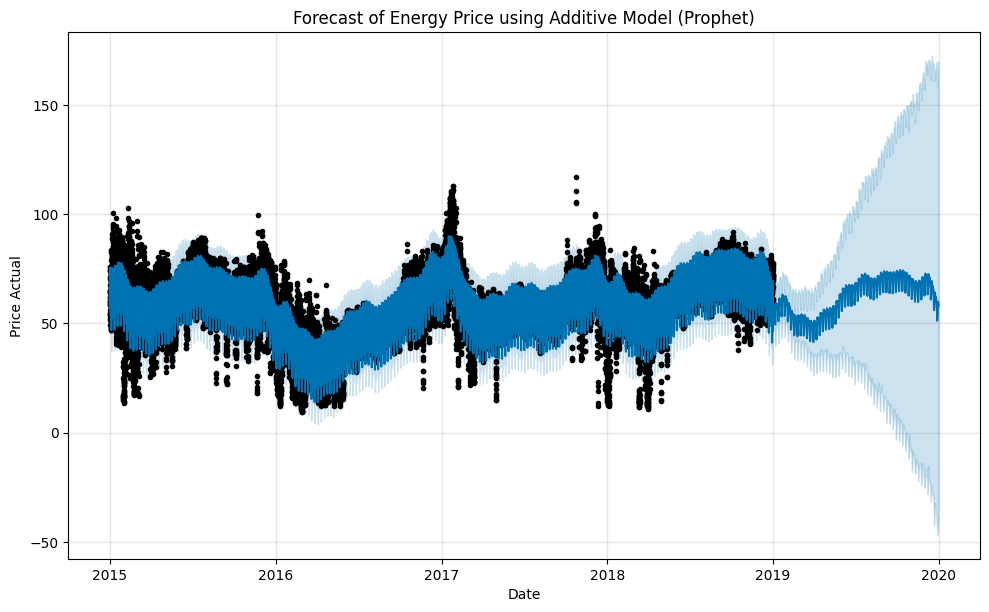

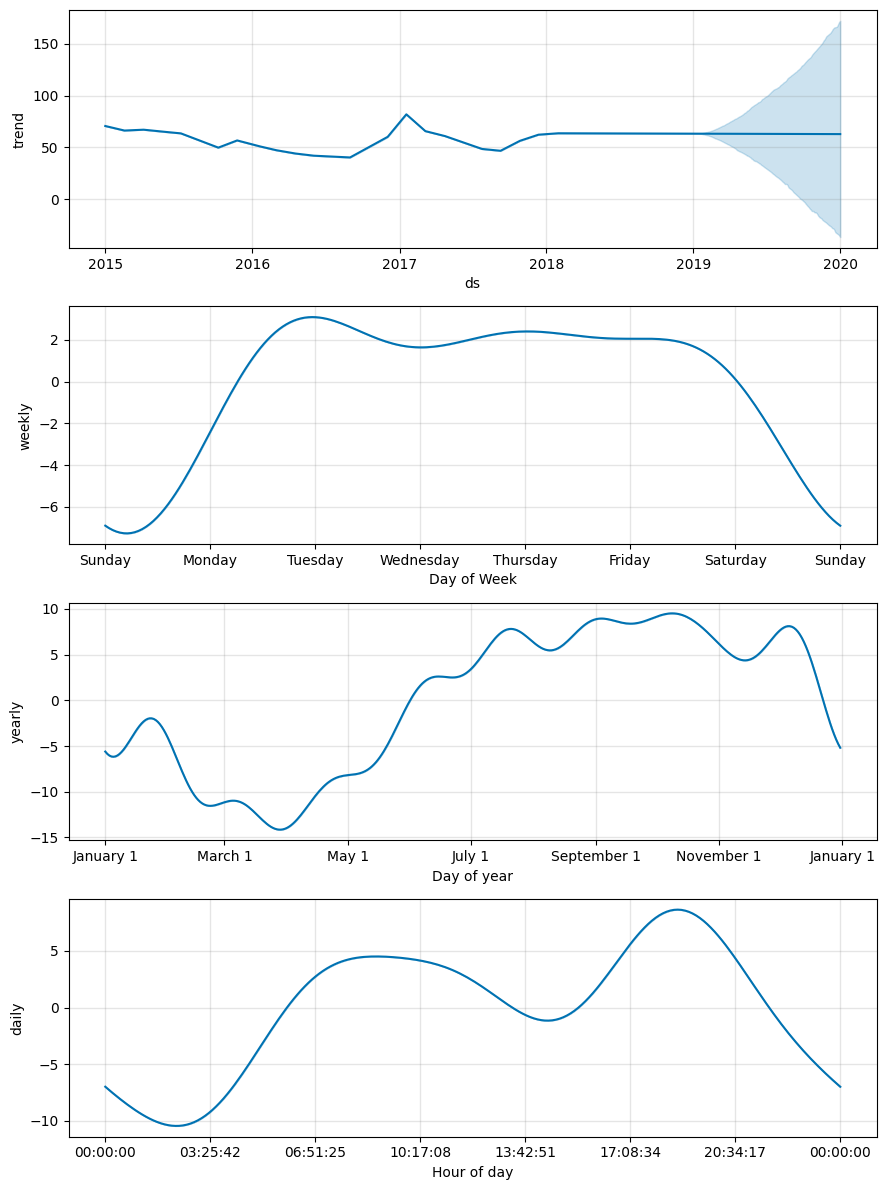

In [35]:
from matplotlib import pyplot as plt
from prophet import Prophet
import pandas as pd

# Reset the index to get 'time' as a column, and drop NaNs if necessary
df_prophet = df_final.reset_index()[['time', 'price actual']].rename(columns={'time': 'ds', 'price actual': 'y'})

# Remove timezone information from 'ds' column
df_prophet['ds'] = pd.to_datetime(df_prophet['ds']).dt.tz_localize(None)

# Initialize and fit the Prophet model
model = Prophet()
df_prophet = df_prophet.dropna()  # Drop any rows with NaN values to avoid errors
model.fit(df_prophet)

# Make a future DataFrame for predictions
# Specify frequency based on your data; change 'D' for daily, 'H' for hourly if necessary
future = model.make_future_dataframe(periods=365, freq='D')  # Adjust 'D' or 'H' as needed
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title("Forecast of Energy Price using Additive Model (Prophet)")
plt.xlabel("Date")
plt.ylabel("Price Actual")
plt.show()

# Plot the trend, seasonality, and other components
fig2 = model.plot_components(forecast)
plt.show()


### Support Vector Machines

In [36]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Prepare the data by creating lagged features
def create_lagged_features(data, lag=5):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag + 1)]
    columns.append(df)
    df_lagged = pd.concat(columns, axis=1)
    df_lagged.columns = [f'lag_{i}' for i in range(lag, 0, -1)] + ['target']
    df_lagged.dropna(inplace=True)
    return df_lagged

# Assume 'price actual' is the column we're predicting
df_svm = create_lagged_features(df_final['price actual'], lag=5)

# Split data into features and target
X = df_svm.drop('target', axis=1)
y = df_svm['target']

# Train-test split (e.g., 80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Train the SVM model
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train_scaled, y_train_scaled)

# Predict and inverse scale the predictions
y_pred_scaled = svm_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 6.220249376822749
Root Mean Squared Error (RMSE): 2.49404277766496
Mean Absolute Error (MAE): 1.729031495158773
R-squared (R²): 0.9536372561125774


### Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)


# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R²): {r2_rf}")


Mean Squared Error (MSE): 6.961310558281515
R-squared (R²): 0.9481137428770948


### Support Vector Machines with kernels

In [38]:
# Initialize and train the Support Vector Regressor with an RBF kernel
from sklearn.svm import SVR


svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Make predictions with the SVR model
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"R-squared (R²): {r2_svr}")

Mean Squared Error (MSE): 6.399176054157918
R-squared (R²): 0.9523036228105385


### Neural Network

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_nn = model.predict(X_test).flatten()

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {mse_nn}")
print(f"R-squared (R²): {r2_nn}")

C:\Users\asmun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 249.6665 - val_loss: 11.7698
Epoch 2/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.9070 - val_loss: 11.3931
Epoch 3/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.5725 - val_loss: 10.8789
Epoch 4/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.1245 - val_loss: 10.1148
Epoch 5/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.2521 - val_loss: 11.7192
Epoch 6/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.7927 - val_loss: 9.8521
Epoch 7/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.6171 - val_loss: 10.8010
Epoch 8/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.6950 - val_loss: 9.6693
Epoch 9/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.8795 - val_loss: 9.9888
Epoch 10/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.8641 - val_loss: 9.9613
Epoch 11/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.7928 - val_loss: 10.3192
Epoch 12/100
702/702 ━━━━━━━